In [ ]:
# Get thinkdsp.py

import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate, read_wave, Spectrum, Wave

def serial_corr (wave, lag=1):
  N = len (wave)
  y1 = wave.ys[lag:]
  y2 = wave.ys[:N-lag]
  corr = np.corrcoef(y1, y2)[0, 1]
  return corr

def autocorr (wave):
  lags = range(len(wave.ys)//2)
  corrs = [serial_corr(wave, lag) for lag in lags]
  return lags, corrs

--2022-04-05 22:36:51--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-05 22:36:51--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.001s  

2022-04-05 22:36:51 (53.7 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# Упражнение 1
Блокнот Jupyter этой главы, chap05.ipynb, содержит приложение,
в котором можно вычислить автокорреляции для различных lag.
Оцените высоты тона вокального чирпа для нескольких времен начала сегмента.


In [ ]:
if not os.path.exists('28042__bcjordan__voicedownbew.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav

--2022-04-05 22:46:41--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/28042__bcjordan__voicedownbew.wav [following]
--2022-04-05 22:46:41--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/28042__bcjordan__voicedownbew.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125996 (123K) [audio/wav]
Saving to: ‘28042__bcjordan__voicedownbew.wav’

28042__bcjordan__vo 100%[===================>] 123.04K  --.-KB/s    in 0.004s  

2022-04-05 22:46:41 (33.7 MB/s)

In [ ]:
from thinkdsp import read_wave

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

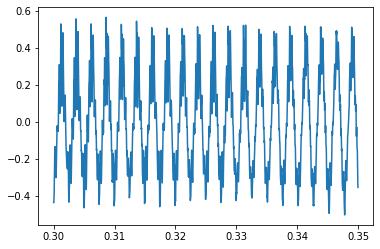

In [ ]:
segment = wave.segment(start=0.3, duration=0.05)
segment.plot()


Функция автокореляции:

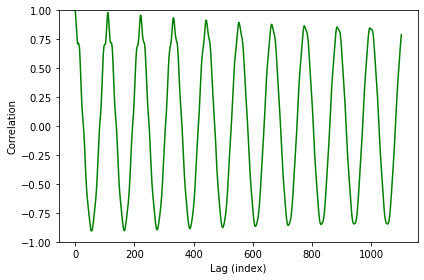

In [ ]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs, color='green')
decorate(xlabel='Lag (index)', ylabel='Correlation', ylim=[-1, 1])

In [ ]:
low, high = 50, 200
lag = np.array(corrs[low:high]).argmax() + low
print("lag = ",lag)

lag =  111


In [ ]:
period = lag / segment.framerate
frequency = 1 / period
print("freq = ", frequency)

freq =  397.2972972972973


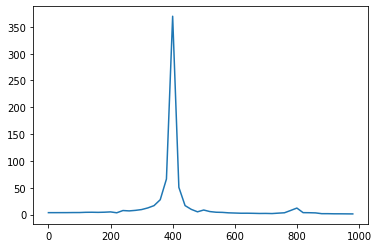

In [ ]:
spectrum = segment.make_spectrum().plot(high = 1000)

Высота тона полностью совпадает со спектром.

Вычислим максимальную частоту на другом промежутке:

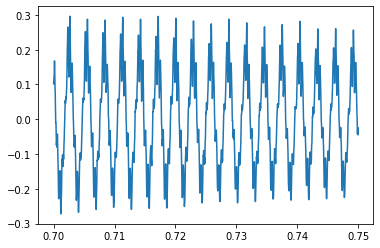

In [ ]:
segment = wave.segment(start=0.7, duration=0.05)
segment.plot()

Автокореляция:

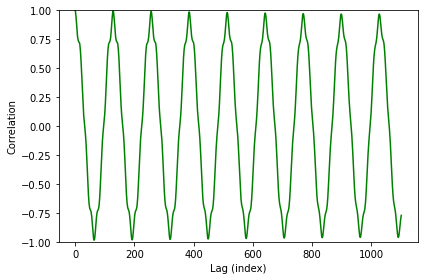

In [ ]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs, color='green')
decorate(xlabel='Lag (index)', ylabel='Correlation', ylim=[-1, 1])

In [ ]:
low, high = 50, 200
lag = np.array(corrs[low:high]).argmax() + low
print("lag = ",lag)

lag =  128


In [ ]:
period = lag / segment.framerate
frequency = 1 / period
print("freq = ", frequency)

freq =  344.53125


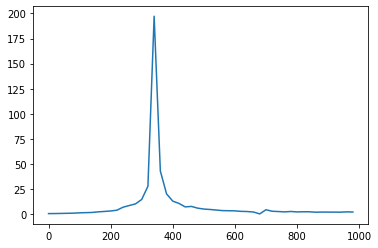

In [ ]:
spectrum = segment.make_spectrum().plot(high = 1000)

# Упражнение 2
Пример кода в chap05.ipynb показывает, как использовать автокорреляцию для оценки основной частоты периодического сигнала.
Инкапсулируйте этот код в функцию, названную estimate_fundamental, и используйте ее для отслеживания высоты тона записанного звука.

Проверьте, насколько хорошо она работает, накладывая оценки высоты тона на спектрограмму записи.

In [ ]:
def estimate_fundamental(segment, low=50, high=200):
  lags, corrs = autocorr(segment)
  lag = np.array(corrs[low:high]).argmax() + low
  period = lag / segment.framerate
  frequency = 1 / period
  return frequency

In [ ]:
estimate_fundamental(segment)

344.53125

Функция работает корректно, получили то же значение, проитанное руками в предыдущем пункте

Просчитаем основную частоту на всей длинне записи, и сравним ее со спектром:

In [ ]:
duration = wave.duration
step = 0.05
start = 0.05 #чтобы убрать эффект включения аудиозаписи*
time = []
freq = []
while start + step < duration:
  time.append(start + step/2)
  freq.append(estimate_fundamental(wave.segment(start=start,duration=step)))
  start += step

Сравним спектрограмму и получившуюся функцию высоты:

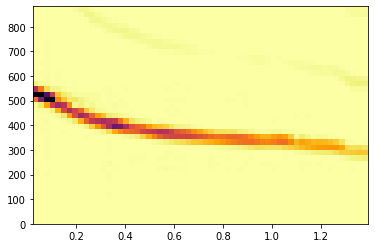

In [ ]:
wave.make_spectrogram(2048).plot(high=900)

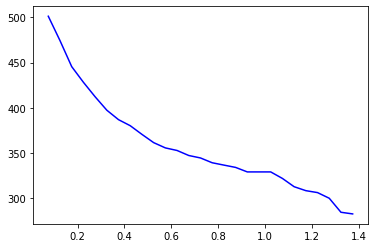

In [ ]:
plt.plot(time, freq, color='blue')

Не очень наглядно, совместим графики:

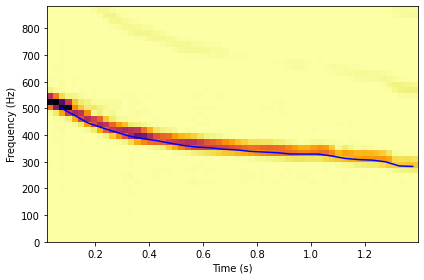

In [ ]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(time, freq, color='blue')
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Все работает восхитительно!

# Упржанение 3
Для упражнений в предыдущей главе были нужны исторические цены BitCoins, и надо было оценить спектр мощности изменения цен.
Используя те же данные, вычислите автокорреляции цен в платежной системе Bitcoin. Быстро ли спадает автокорреляционная функция? Есть ли признаки периодичности процесса?

In [ ]:
  if not os.path.exists('btc_daily_mention.csv'):
    !wget https://github.com/donebd/telecom_spbstu2022/raw/main/res/lab4/btc_daily_mention.csv

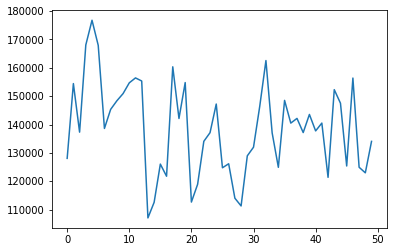

In [ ]:
import pandas as pd

df = pd.read_csv('btc_daily_mention.csv')
ys = df['value']
ts = df.index

w = Wave(ys, framerate=1)
w.plot()

Автокорреляция:

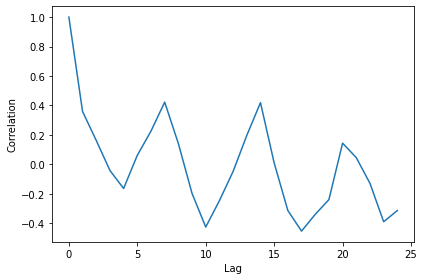

In [ ]:
lags, corrs = autocorr(w)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

Автокорреляционная функция спадает быстро, есть признаки периодичности, но опять же здесь вероятно всего слишком маленькая выборка.

# Упражнение 4
В репозитории этой книги есть блокнот Jupyter под названием saxophone.ipynb, в котором исследуются автокорреляция, восприятие высоты тона и явление, называемое подавленная основная. Прочтите этот блокнот и «погоняйте» примеры. Выберите другой сегмент записи и вновь поработайте с примерами.

У Ви Харт (Vi Hart) есть отличное видео под названием «Так что же там с шумами(Наука и математика звука, частота и высота тона)». Она демонстрирует феномен подавленной основной и объясняет, как воспринимается высота тона (по крайней мере, насколько об этом известно). См. https://www.youtube.com/watch?v=i_0DXxNeaQ0.


In [ ]:
if not os.path.exists('100475__iluppai__saxophone-weep.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

--2022-04-05 23:41:46--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/100475__iluppai__saxophone-weep.wav [following]
--2022-04-05 23:41:46--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/100475__iluppai__saxophone-weep.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2071600 (2.0M) [audio/wav]
Saving to: ‘100475__iluppai__saxophone-weep.wav’

100475__iluppai__sa 100%[===================>]   1.98M  --.-KB/s    in 0.02s   

2022-04-05 23:41:46 (8

In [ ]:
wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

Возьмем отрезок

In [ ]:
segment = wave.segment(start=5, duration=0.2)
segment.make_audio()

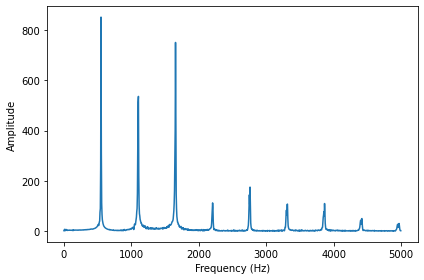

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [ ]:
spectrum.peaks()[:6]

[(851.286051294676, 550.0),
 (750.4194893967242, 1655.0),
 (535.8765203756585, 1105.0),
 (512.9125469185768, 1100.0),
 (432.157194360438, 1660.0),
 (401.1365125794491, 1650.0)]

Возьмем треугольный сигнал с такой же основной частотой


In [ ]:
from thinkdsp import TriangleSignal

TriangleSignal(freq=550).make_wave(duration=0.2).make_audio()

Сейчас у сигналов одинаковая воспринимаемая частота - 550

Для анализа применим нашу автокорреляционную функцию

In [83]:
def autocorr_(segment):
    corrs = np.correlate(segment.ys, segment.ys, mode='same')
    N = len(corrs)
    lengths = range(N, N//2, -1)

    half = corrs[N//2:].copy()
    half /= lengths
    half /= half[0]
    return half

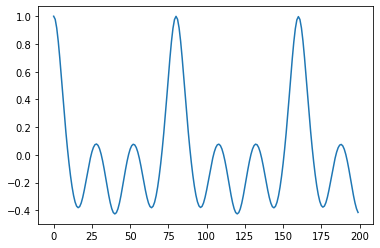

In [89]:
corrs = autocorr_(segment)
plt.plot(corrs[:200])

In [100]:
corrs[79], corrs[80], corrs[81]

(0.9764409474654036, 0.9992407118598035, 0.978030668352388)

Пик при lag = 80

In [101]:
print("Fmax = ", estimate_fundamental(segment))

Fmax =  551.25


Уберем основной тон:

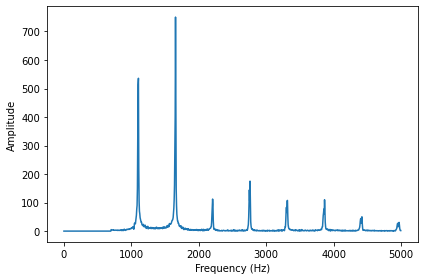

In [104]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(700)
spectrum2.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [108]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

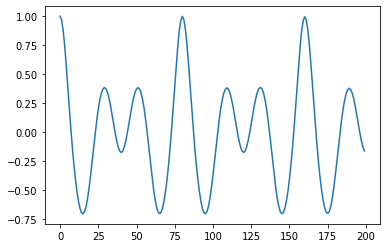

In [109]:
corrs = autocorr_(segment2)
plt.plot(corrs[:200])

In [110]:
corrs[79], corrs[80], corrs[81]

(0.96715203971728, 0.9984968648709538, 0.9691066543157081)

Мы слышим ту же ноту, хотя основная частота поменялась. Это связанно с тем что гармоники основной частоты никуда не делись, и они влияют на восприятие